## Дипломная работа по курсу «Python для анализа данных»

1.Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

3.Рассчитать и визуализировать корреляционную матрицу для переменных.

4.Визуализировать несколько взаимосвязей между переменными.

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

6.Рассчитать сколько работников работает в каждом департаменте.

7.Показать распределение сотрудников по зарплатам.

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

9.Сколько сотрудников покинули компанию.

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [136]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [45]:
data = pd.read_csv('hr.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
data.shape

(14999, 10)

###  2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [20]:
data.describe()       # в таблице есть среднее (mean), минимум(min), макисмум (max), среднее отклонение (std)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [38]:
median = data.iloc[:,:8].apply(lambda x: statistics.median(x))      # медиана для численных атрибутов
median

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [64]:
mode1 = data.iloc[:,:3].apply(lambda x: statistics.mode(x))      # мода
mode1

satisfaction_level    0.10
last_evaluation       0.55
number_project        4.00
dtype: float64

In [65]:
mode2 = data.iloc[:,5:].apply(lambda x: statistics.mode(x))      # мода
mode2

Work_accident                0
left                         0
promotion_last_5years        0
sales                    sales
salary                     low
dtype: object

In [59]:
statistics.mode(data['average_montly_hours'])    # 'average_montly_hours' - бимодальный атрибут

StatisticsError: no unique mode; found 2 equally common values

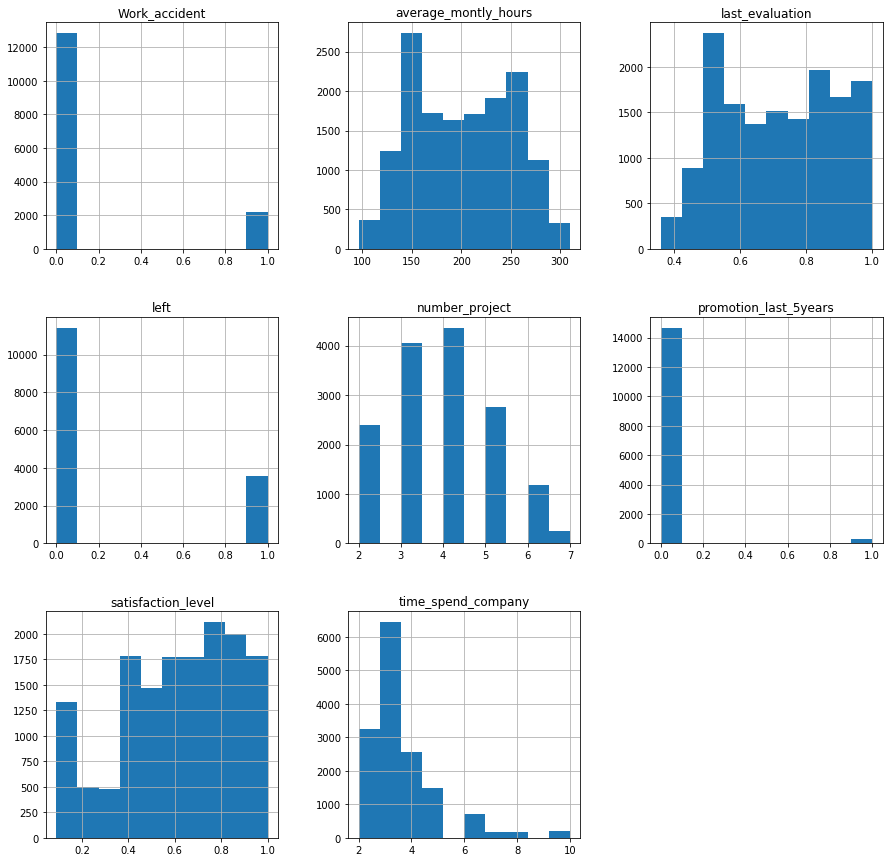

In [53]:
data.hist(figsize=(15,15))
plt.show()

###  3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [16]:
## Сначала приведем все данные в численный вид - заменим данные по категориальным атрибутам sales и salary на числовые

print(data.sales.unique())
print(data.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [47]:
def digitize(x):
    a = 0
    names_dict, x_app = {}, []
    for i in list(x.unique()):
        names_dict[i] = a
        a+=1
    for i in x:
        for j,k in names_dict.items():
            if i == j:
                x_app.append(k)          
    print(names_dict)
    return pd.DataFrame(x_app, columns = pd.DataFrame(x).columns)

In [48]:
import copy
data_append = copy.copy(data)
data_append.sales = digitize(data.sales)
data_append.salary = digitize(data.salary)

{'sales': 0, 'accounting': 1, 'hr': 2, 'technical': 3, 'support': 4, 'management': 5, 'IT': 6, 'product_mng': 7, 'marketing': 8, 'RandD': 9}
{'low': 0, 'medium': 1, 'high': 2}


In [49]:
data_append.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [57]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

data_norm = pd.DataFrame(min_max_scaler.fit_transform(data_append))
data_norm.columns = list(data_append.columns.values)

corr = np.round_(data_norm.corr(), decimals=2)
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03,0.02,0.05
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01,0.01,-0.00
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00,-0.00,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07,-0.00,0.05
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04,0.02,0.01
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06,-0.04,-0.16
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00,0.02,0.10
sales,0.02,0.01,0.01,-0.00,-0.00,0.02,-0.04,0.02,1.00,0.03
salary,0.05,-0.01,-0.00,-0.00,0.05,0.01,-0.16,0.10,0.03,1.00


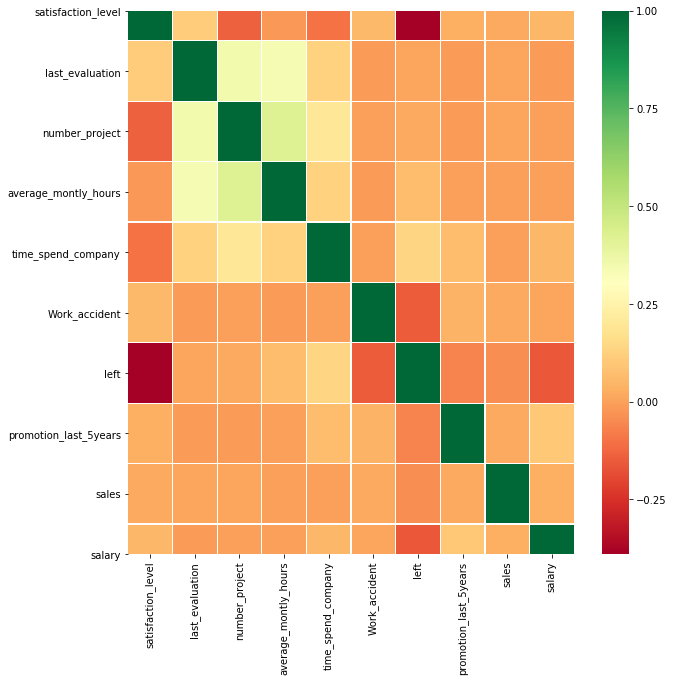

In [146]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)

# cлабая прямая корреляция между number_project и average_monthly_hours; обратная слабая между satisafction и left

### 4.Визуализировать несколько взаимосвязей между переменными.


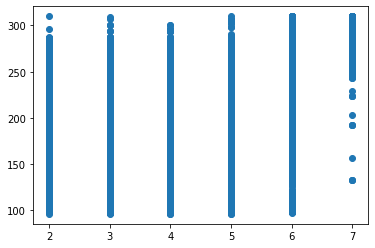

In [68]:
plt.scatter(data.number_project, data.average_montly_hours)
plt.show()

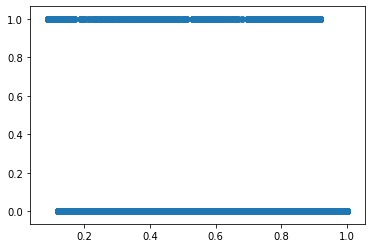

In [65]:
plt.scatter(data_append.satisfaction_level, data_append.left)
plt.show()

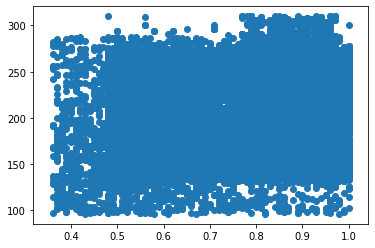

In [148]:
plt.scatter(data.last_evaluation, data.average_montly_hours)

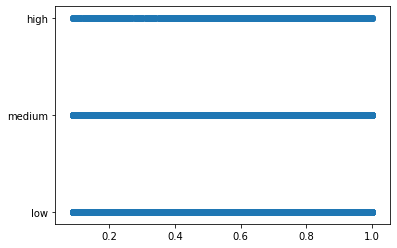

In [152]:
plt.scatter(data.satisfaction_level, data.salary)

### 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [153]:
stats.ttest_ind(data.last_evaluation, data.satisfaction_level)  
#  p-value < 0.05 => имеется статистическое различие между атрибутами. 

Ttest_indResult(statistic=41.89868154070206, pvalue=0.0)

### 6.Рассчитать сколько работников работает в каждом департаменте.



In [69]:
data.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [72]:
employee_count_dep = {}
for x in list(data.sales.unique()):
    employee_count_dep[x] = 0
for i in data.sales:
    for a, b in employee_count_dep.items():
        if i == a:
            employee_count_dep[a] += 1

In [78]:
print(employee_count_dep)   # словарь с числом сотрудников в каждом отделе
sum(employee_count_dep.values()) == len(data.sales)    # проверка

{'sales': 4140, 'accounting': 767, 'hr': 739, 'technical': 2720, 'support': 2229, 'management': 630, 'IT': 1227, 'product_mng': 902, 'marketing': 858, 'RandD': 787}


True

### 7.Показать распределение сотрудников по зарплатам.

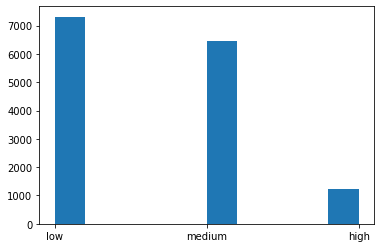

In [81]:
plt.hist(data.salary)
plt.show()

### 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

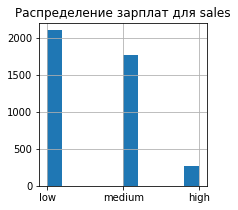

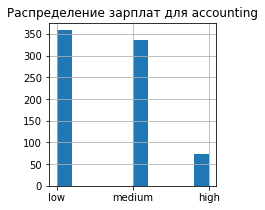

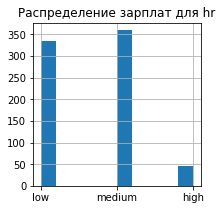

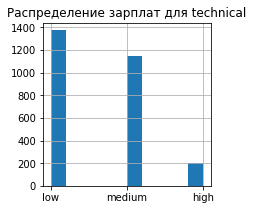

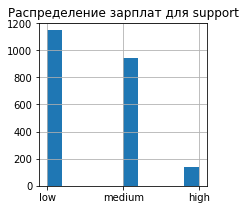

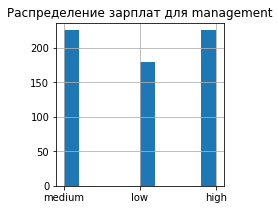

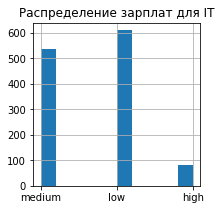

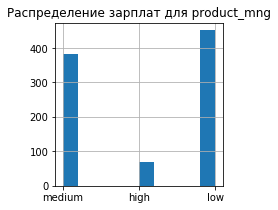

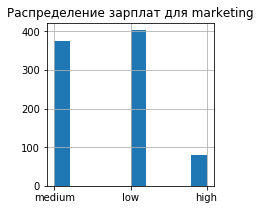

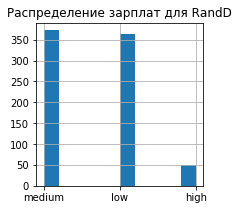

In [89]:
for i in employee_count_dep.keys():
    data.salary[data.sales == i].hist(figsize=(3,3))
    plt.title(f'Распределение зарплат для {i}')
    plt.show()    

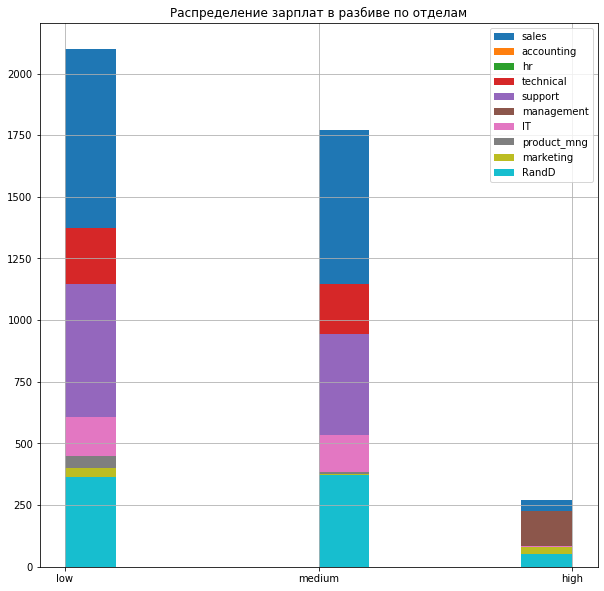

In [96]:
for i in employee_count_dep.keys():
    data.salary[data.sales == i].hist(figsize=(10,10))
plt.title('Распределение зарплат в разбиве по отделам')      # Выглядит логично - высокая з/п в основном у менеджмента
plt.legend(employee_count_dep.keys())
plt.show()    

### 9.Сколько сотрудников покинули компанию.

In [100]:
sum(data.left)    #  3571 сотрудника покуинули компанию

3571

###  10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [103]:
# Проверим есть ли статистически существенная разница между ушедшими и оставшимися по атрибутам:
# satisfaction_level, promotion_last_5years, last_evaluation

In [157]:
data_left = data_append[data.left == 1]
data_stayed = data_append[data.left == 0]

In [171]:
# по satisfaction_level
stats.ttest_ind(data_left.satisfaction_level, data_stayed.satisfaction_level)  
#  p-value < 0.05 => имеется статистическое различие  => вероятна разница в удовлетворенности оставшихся и ушедших

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

In [172]:
# по promotion_last_5years
stats.ttest_ind(data_left.promotion_last_5years, data_stayed.promotion_last_5years)  
#  p-value < 0.05 => имеется статистическое различие => вероятна разница в получении повышения у оставшихся и ушедших

Ttest_indResult(statistic=-7.581195349367637, pvalue=3.624047224146943e-14)

In [173]:
# по last_evaluation
stats.ttest_ind(data_left.last_evaluation, data_stayed.last_evaluation) 
#  p-value > 0.05 => нет статистической разницы в оценке (last_evaluation) у оставшихся и ушедших

Ttest_indResult(statistic=0.8042416167796329, pvalue=0.4212701963735056)